In [1]:
import os
os.chdir("..")

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import Thesis_viz as viz
from utils import synthetic_data_generation as sd

## For plotting the individual model comparision

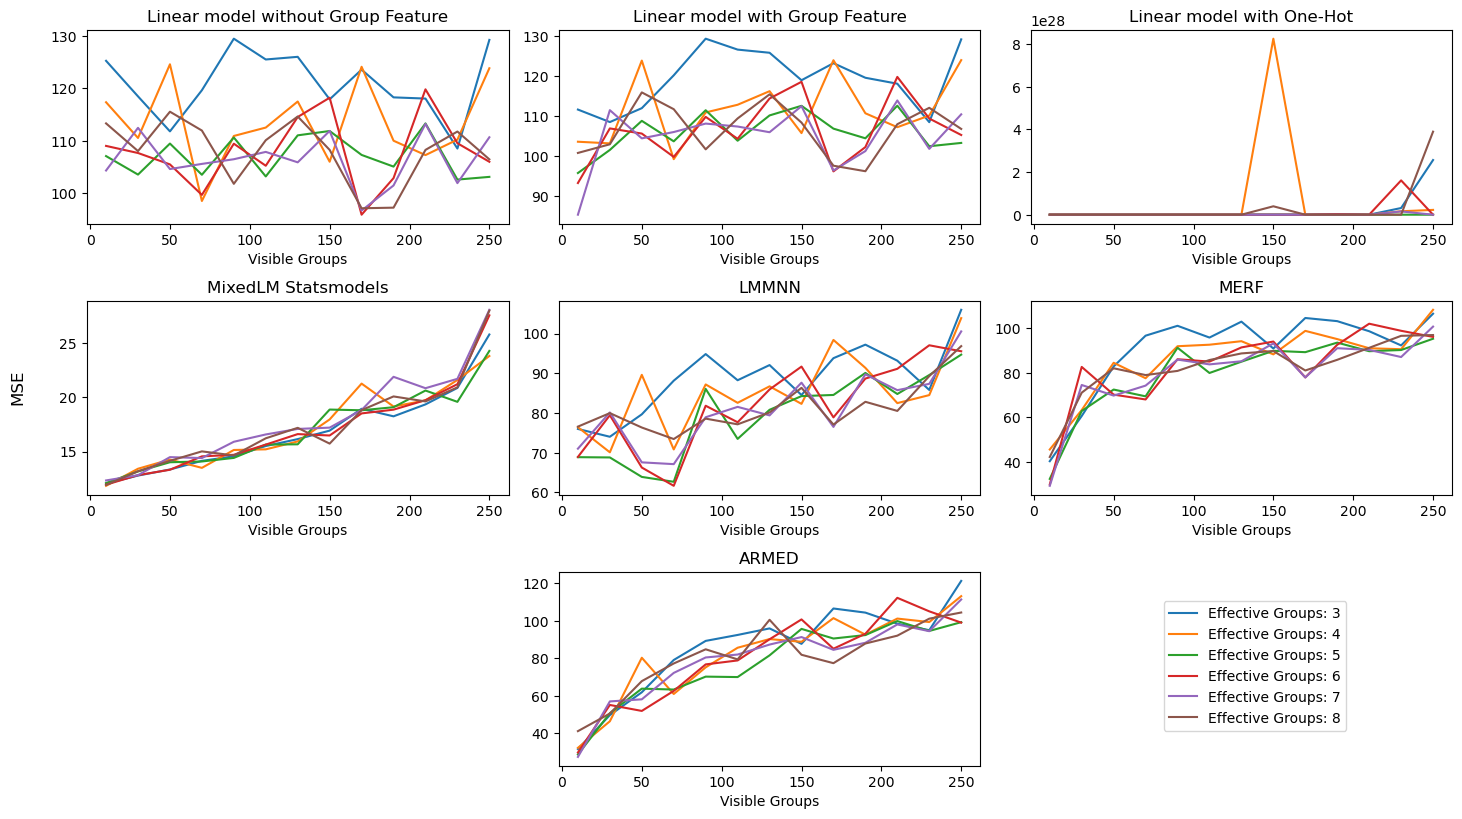

In [3]:
res = pd.read_csv(r"Results\r1_multiple.csv", index_col = False)
viz.plot_ALL_model_comparision_range_individual_effective_group(res[res['mode'] == 'both'], use_rmse=False)
# plt.savefig(r"Results\r1_multiple_all_models_both.pdf", format = 'pdf',bbox_inches='tight')

## For plotting a specific effective group and comapre all the models.

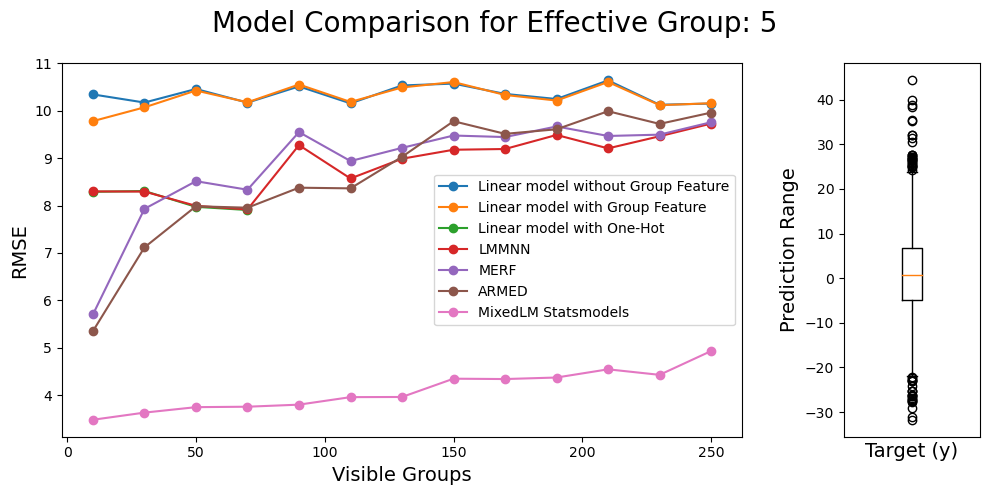

In [4]:
res = pd.read_csv(r"Results\r1_multiple.csv", index_col = False)
viz.plot_combined_model_comparision_mean_performance_individual_effective_group(res[res['mode'] == 'both'], 5, use_rmse=True)
# plt.savefig(r"Results\r1_multiple_all_models_both_5.pdf", format = 'pdf',bbox_inches='tight')

## 3D plot for a single model

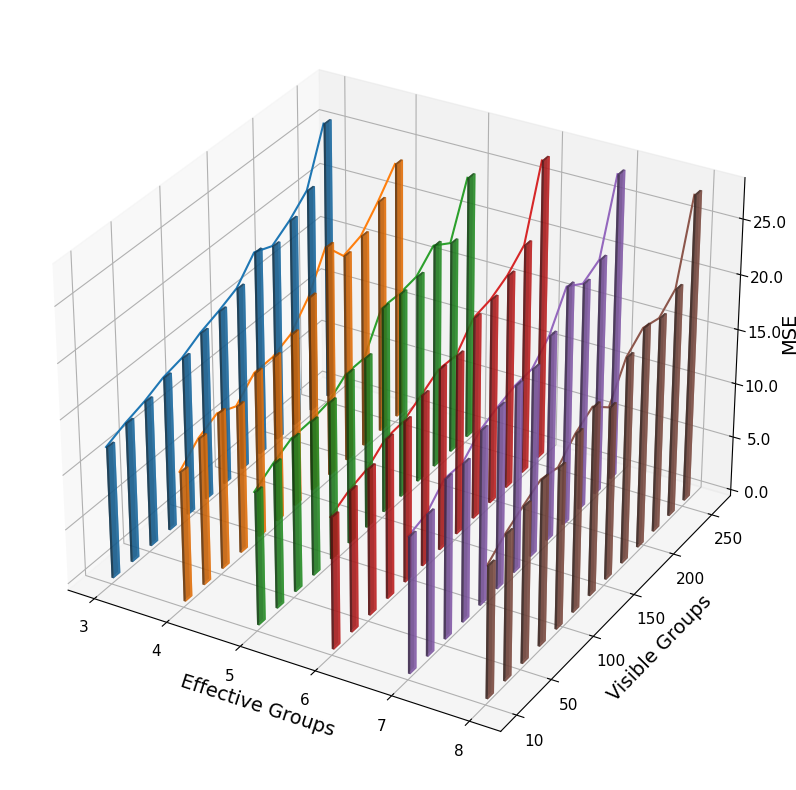

In [12]:
res = pd.read_csv(r"Results\r1_multiple.csv", index_col = False)
viz.plot_results_3D(res[res['mode'] == 'both'], 'mse_mixedlm') # mse_lmmnn, mse_armed, mse_merf, mse_linearohe

## For comparing the performance with visible groups and effective groups.

#### This requires two results dataframes, as the effective group's performance is calculated separately. Both results must have the same data configuration.

#### The simulation has the results of all three types of random effects, here data is filtered for 'both' mode: Intercepts and Slopes.

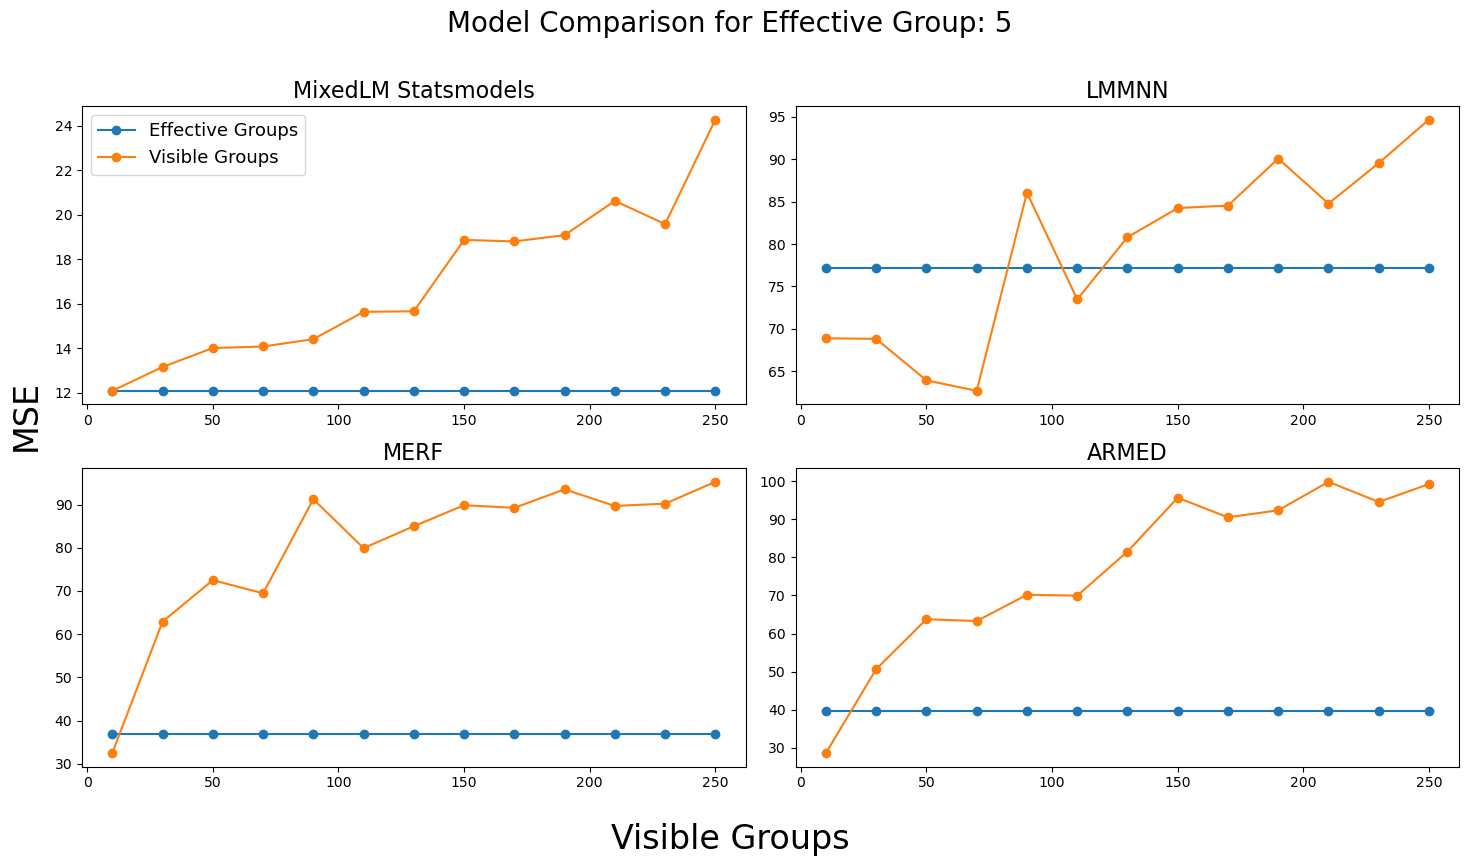

In [10]:
res_gV = pd.read_csv(r"Results/r1_multiple.csv", index_col = False)
res_gE = pd.read_csv(r"Results/r1_multiple_features_effective_groups.csv", index_col = False)
viz.plot_model_comparison_effective_and_visible_groups(res_gE[res_gE['mode'] == 'both'], res_gV[res_gV['mode'] == 'both'], 5)
# plt.savefig(r"Results\r1_multiple_effective_vs_visible_both_5.pdf", format = 'pdf',bbox_inches='tight')

## Execution time of Simulation for models

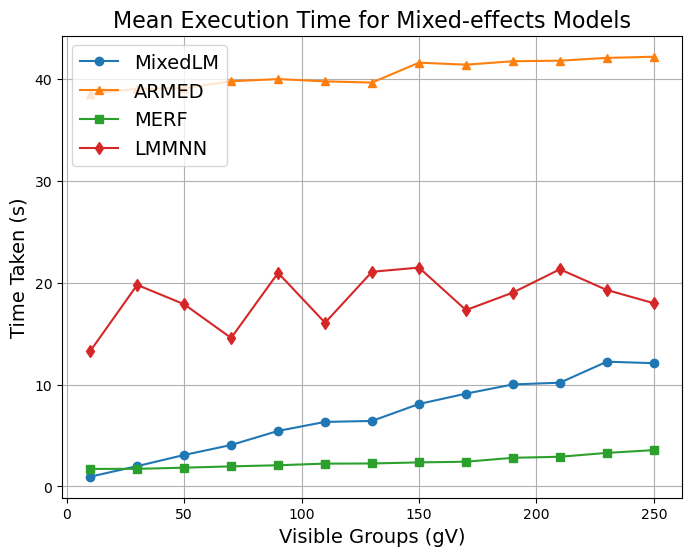

In [14]:
res = pd.read_csv(r"Results\r1_multiple.csv", index_col = False)

plt.figure(figsize=(8, 6), dpi=100)

display_model_names = ['MixedLM', 'ARMED', 'MERF', 'LMMNN']
time_model_names = ['time_mixedlm', 'time_armed', 'time_merf', 'time_lmmnn']
markers = ['o', '^', 's', 'd']

mean_time_per_gV = res.groupby('gV')[time_model_names].mean().reset_index()

for model_name, time_column, marker in zip(display_model_names, time_model_names, markers):
    plt.plot(mean_time_per_gV['gV'], mean_time_per_gV[time_column], label=model_name, marker=marker, linestyle='-')

plt.xlabel('Visible Groups (gV)', fontsize=14)
plt.ylabel('Time Taken (s)', fontsize=14)
plt.legend(loc = 'upper left', fontsize=14)
plt.title("Mean Execution Time for Mixed-effects Models", fontsize = 16)
plt.grid(True)
plt.show()

## For visualizing synthetic data with different random effects. show_random_effects=True in data generation function,
 Example:

In [25]:
df,_ = sd.create_data(
    n = 1000,
    n_effective_groups = 5,
    n_visible_groups = 20,
    n_contineous_features = 5,
    mode = 'both',
    fixed_slope=(0, 1),
    fixed_intercept=0,
    fixed_error=(0, 1),
    random_effects_distribution='linspace',
    re_intercept=(-10, 10),
    re_slope=(-10, 10),
    error_type='on_group',
    re_error=(0, 3),
    random_seed=100,
    shuffle_groups=False,
    show_random_effects=True,
)
df

,f0,f1,f2,f3,f4,gE,gV,intercept,slope_f0,slope_f1,slope_f2,slope_f3,slope_f4,Y_Fixed,y
0,0.086810,-0.443261,-0.150965,0.689552,-0.990562,0,0,-11.749765,-9.485781,-8.945487,-9.403377,-7.689496,-6.411665,1.157364,-4.982249
1,-0.756862,0.341498,0.651706,-0.726587,0.150187,0,0,-11.749765,-9.485781,-8.945487,-9.403377,-7.689496,-6.411665,-0.958912,-10.088213
2,0.782644,-0.581596,-0.629344,-0.783246,-0.560605,0,0,-11.749765,-9.485781,-8.945487,-9.403377,-7.689496,-6.411665,3.157883,4.721921
3,0.957248,0.623366,-0.656118,0.632449,-0.451853,0,0,-11.749765,-9.485781,-8.945487,-9.403377,-7.689496,-6.411665,1.210999,-20.991689
4,-0.136592,0.880060,0.635299,-0.327776,-0.649179,0,0,-11.749765,-9.485781,-8.945487,-9.403377,-7.689496,-6.411665,-0.929072,-18.546922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.958601,-0.061547,-0.612691,0.001276,-0.624464,4,19,10.981321,7.603749,8.231000,9.694889,8.840429,10.055676,0.165538,5.721134
996,-0.406576,-0.063730,0.283787,0.510465,-0.199057,4,19,10.981321,7.603749,8.231000,9.694889,8.840429,10.055676,1.295205,13.922829
997,-0.980118,-0.609176,0.907477,0.308686,-0.711728,4,19,10.981321,7.603749,8.231000,9.694889,8.840429,10.055676,0.969126,3.853643
998,0.290163,-0.558831,-0.964902,-0.689468,0.954931,4,19,10.981321,7.603749,8.231000,9.694889,8.840429,10.055676,-0.762656,1.977925


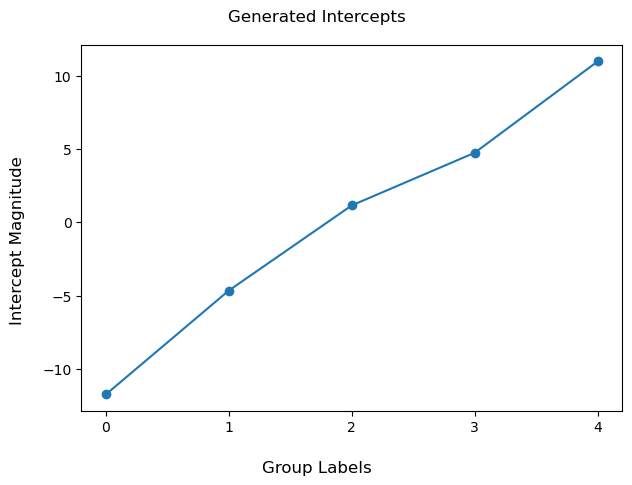

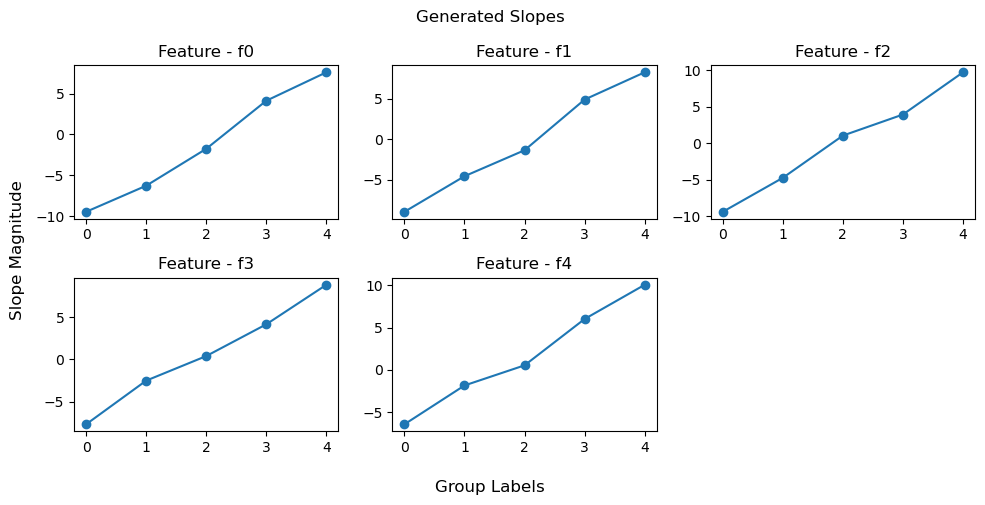

In [26]:
viz.plot_intercept_distribution(df)
viz.plot_slope_distribution(df)